In [179]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

#datasetfile = 'IMDB Dataset.csv'
datasetfile = 'https://huggingface.co/datasets/scikit-learn/imdb/resolve/main/IMDB%20Dataset.csv?download=true'
dat = pd.read_csv(datasetfile)
dat.head()    

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [180]:
x = dat['review']
y = dat['sentiment']
# Разделение данных
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.3, random_state = 50)

In [181]:
# Создадим словарь частоты слов
#vectorizer = CountVectorizer(stop_words = "english")
#X_train_freq = vectorizer.fit_transform(X_train)
#X_train_freq.shape

In [182]:
# Нормализуем текстовые данные
#from sklearn.feature_extraction.text import TfidfTransformer

#tfidf_transf = TfidfTransformer()

#X_train_tfidf = tfidf_transf.fit_transform(X_train_freq)
#X_train_tfidf.shape

In [183]:
#from sklearn.svm import LinearSVC
#classifier = LinearSVC(dual='auto')
#classifier.fit(X_train_tfidf,Y_train)

In [184]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_classifier = Pipeline([
    ('tfidvectorizer',TfidfVectorizer()),
    ('LinearSVC',LinearSVC(dual='auto'))
])

text_classifier.fit(X_train,Y_train)

Pipeline(steps=[('tfidvectorizer', TfidfVectorizer()),
                ('LinearSVC', LinearSVC(dual='auto'))])

Точность оценки: 0.899


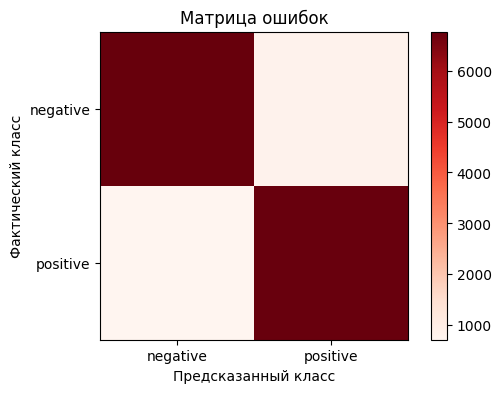

In [185]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# Предсказание на тестовом наборе
y_pred = text_classifier.predict(X_test)

# Метрики качества
print("Точность оценки:", accuracy_score(Y_test, y_pred))

# Расчет матрицы ошибок
cm = confusion_matrix(Y_test, y_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title('Матрица ошибок')
plt.colorbar()
classes = text_classifier.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Предсказанный класс')
plt.ylabel('Фактический класс')
plt.show()

